In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import seaborn as sns


from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier



Visualizing the Dataset

In [10]:
X = pd.read_csv('data/X_train.csv')
X.drop(["Id"], axis=1, inplace=True)

In [12]:
X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,21470,0.0,2.130706e+09,168.0,0.0,0.0,0.0,0.0,0.0,11968.0,...,187028.0,109090.0,228040.0,89664.0,296964.0,78936.0,58.0,0.0,0.0,0.0
1,40856,NaN,5.540000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,526386.0,277000.0,612436.0,441664.0,84968.0,2204.0,78.0,0.0,0.0,0.0
2,28,NaN,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,406.0,80.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38682,NaN,3.440000e+02,326.0,0.0,0.0,0.0,0.0,0.0,0.0,...,244622.0,116794.0,267896.0,307242.0,248998.0,164098.0,300820.0,11238.0,0.0,0.0
4,62218,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,499450.0,242448.0,458620.0,422742.0,390678.0,287052.0,427584.0,10146.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39895,27012,NaN,6.840000e+02,524.0,0.0,0.0,0.0,0.0,0.0,2864.0,...,164630.0,71862.0,97742.0,77936.0,136596.0,598610.0,12034.0,180.0,0.0,0.0
39896,1926,NaN,2.130706e+09,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8194.0,4228.0,21584.0,54614.0,528.0,50.0,18.0,0.0,0.0,0.0
39897,712,0.0,9.800000e+01,62.0,0.0,0.0,0.0,0.0,0.0,802.0,...,3400.0,964.0,2192.0,5428.0,6110.0,11382.0,0.0,0.0,0.0,0.0
39898,61980,NaN,3.060000e+02,226.0,0.0,0.0,0.0,0.0,0.0,0.0,...,388914.0,192924.0,302652.0,278680.0,218578.0,224358.0,881382.0,90840.0,0.0,0.0


In [13]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,21470,0.0,2.130706e+09,168.0,0.0,0.0,0.0,0.0,0.0,11968.0,...,187028.0,109090.0,228040.0,89664.0,296964.0,78936.0,58.0,0.0,0.0,0.0
1,40856,NaN,5.540000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,526386.0,277000.0,612436.0,441664.0,84968.0,2204.0,78.0,0.0,0.0,0.0
2,28,NaN,2.130706e+09,20.0,0.0,0.0,0.0,0.0,0.0,0.0,...,406.0,80.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38682,NaN,3.440000e+02,326.0,0.0,0.0,0.0,0.0,0.0,0.0,...,244622.0,116794.0,267896.0,307242.0,248998.0,164098.0,300820.0,11238.0,0.0,0.0
4,62218,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,499450.0,242448.0,458620.0,422742.0,390678.0,287052.0,427584.0,10146.0,0.0,0.0


In [14]:
X.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,3.990000e+04,9121.000000,3.765900e+04,2.993400e+04,38240.000000,38240.000000,3.943400e+04,3.943400e+04,3.943400e+04,3.943400e+04,...,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,3.943200e+04,38087.000000,38088.000000
mean,6.094339e+04,0.728210,3.536753e+08,2.872309e+05,6.427877,10.552354,2.017626e+02,1.096192e+03,9.547083e+03,9.478814e+04,...,4.486738e+05,2.129917e+05,4.489956e+05,4.013561e+05,3.390282e+05,3.439853e+05,1.375559e+05,8.265914e+03,0.074514,0.236137
std,2.598214e+05,3.107561,7.927850e+08,4.961607e+07,112.420166,177.143548,1.823295e+04,3.272456e+04,1.563888e+05,7.711758e+05,...,1.121988e+06,5.316487e+05,1.129791e+06,1.130969e+06,1.102586e+06,1.626701e+06,4.350107e+05,4.968480e+04,3.610742,12.155503
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.680000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.976000e+03,1.186000e+03,2.740000e+03,3.660000e+03,5.240000e+02,1.160000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.082300e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.351960e+05,1.121640e+05,2.236870e+05,1.907450e+05,9.458700e+04,4.204100e+04,3.992000e+03,0.000000e+00,0.000000,0.000000
75%,4.889650e+04,0.000000,9.700000e+02,4.340000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.394680e+05,2.175255e+05,4.667520e+05,4.037860e+05,2.769340e+05,1.682435e+05,1.397730e+05,1.998500e+03,0.000000,0.000000
max,4.294967e+07,134.000000,2.130707e+09,8.584298e+09,11044.000000,14186.000000,3.376892e+06,3.708310e+06,1.004568e+07,2.904730e+07,...,3.123272e+07,1.454922e+07,2.454544e+07,5.743524e+07,3.160781e+07,3.755240e+07,1.718575e+07,4.570398e+06,350.000000,1720.000000


In [15]:
X.isna().sum()

aa_000        0
ab_000    30779
ac_000     2241
ad_000     9966
ae_000     1660
          ...  
ee_007      468
ee_008      468
ee_009      468
ef_000     1813
eg_000     1812
Length: 170, dtype: int64

In [16]:
X.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.089545,-0.031341,-0.002356,0.076964,0.090797,0.013775,0.153942,0.276290,0.388959,...,0.442188,0.448036,0.446212,0.453586,0.457491,0.392292,0.261199,0.116495,0.007359,0.019192
ab_000,0.089545,1.000000,-0.019470,0.086617,0.042338,0.049992,0.008752,0.025471,0.066968,0.086087,...,0.081551,0.083209,0.113844,0.112301,0.043673,0.032921,0.037495,0.065128,0.046392,0.254613
ac_000,-0.031341,-0.019470,1.000000,-0.002912,-0.005239,-0.010958,0.015936,-0.003770,-0.019351,-0.046500,...,-0.011864,-0.004986,-0.007385,-0.011082,-0.019798,-0.031100,0.013457,0.018149,-0.005716,0.021012
ad_000,-0.002356,0.086617,-0.002912,1.000000,-0.000365,-0.000379,-0.000058,-0.000173,-0.000304,-0.000622,...,-0.003137,-0.003103,-0.003107,-0.002289,-0.001705,-0.001126,-0.002656,-0.001300,-0.000125,-0.000119
ae_000,0.076964,0.042338,-0.005239,-0.000365,1.000000,0.775030,-0.000585,-0.001277,0.004016,0.044020,...,0.024134,0.033356,0.024984,0.029004,0.132433,0.075267,-0.012932,-0.009508,0.034666,0.037616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.392292,0.032921,-0.031100,-0.001126,0.075267,0.084687,0.000256,0.050288,0.145015,0.432072,...,0.398314,0.383424,0.358171,0.367383,0.535988,1.000000,0.240033,0.052414,-0.000089,0.002274
ee_008,0.261199,0.037495,0.013457,-0.002656,-0.012932,-0.014419,-0.000872,0.005017,0.010164,0.025850,...,0.458388,0.487693,0.468963,0.397305,0.355218,0.240033,1.000000,0.633647,-0.006466,-0.000792
ee_009,0.116495,0.065128,0.018149,-0.001300,-0.009508,-0.009981,-0.001173,-0.005030,-0.009676,-0.018640,...,0.202237,0.213437,0.203017,0.158975,0.129768,0.052414,0.633647,1.000000,-0.003264,0.000413
ef_000,0.007359,0.046392,-0.005716,-0.000125,0.034666,0.033883,-0.000210,-0.000271,0.004371,0.008826,...,-0.001895,0.000339,0.000078,0.003138,0.006821,-0.000089,-0.006466,-0.003264,1.000000,0.127594


<AxesSubplot:>

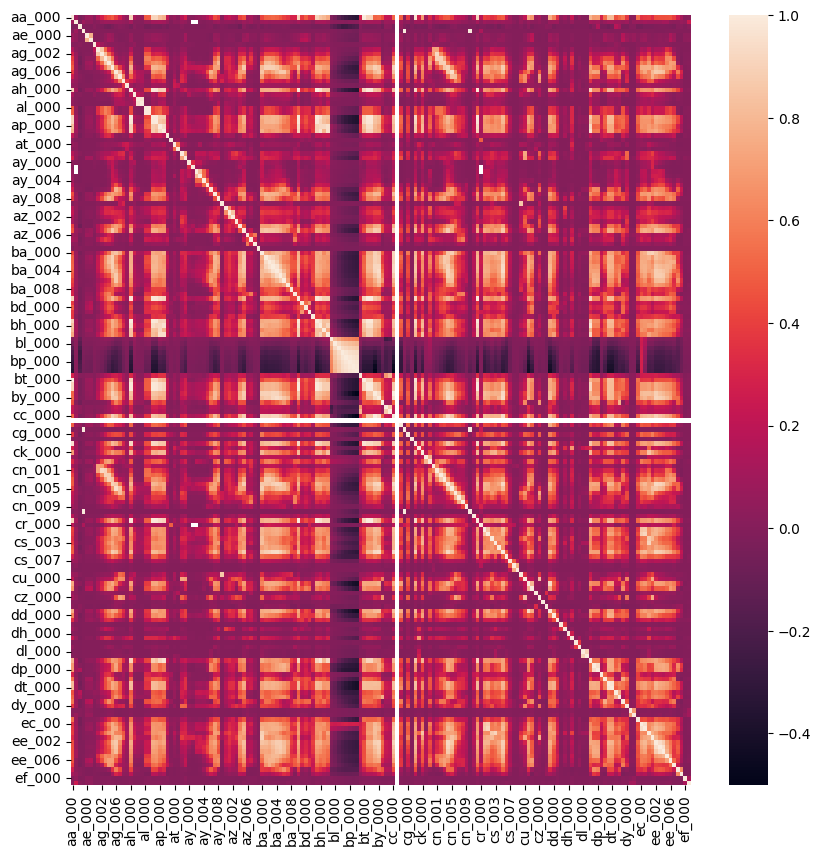

In [19]:
plt.figure(figsize=(10,10)) 
sns.heatmap(X.corr())

Helper Functions

In [2]:
def remove_NaN(df, t):
    return df.dropna(axis=1, thresh=int(((100-t)/100)*df.shape[0] + 1))

In [3]:
def scale(X_train, X_val, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    return X_train, X_val, X_test

In [4]:
def impute(X_train, X_val, X_test):
    imputer = SimpleImputer(strategy = 'most_frequent')
    imputer.fit(X_train)
    X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
    X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
    return X_train, X_val, X_test

In [5]:
sm = SMOTE(random_state=42)
def over_sampling(X, Y): 
    x, y = sm.fit_resample(X, Y)
    return x,y


In [6]:
def score_calc(model, y_val,  y_pred):
    print(model)
    print("Confusion Matrix")
    print(metrics.confusion_matrix(y_val, y_pred))
    print(f"Validation F3 Score: {metrics.fbeta_score(y_val, y_pred, beta=3)}")
    print(f"Classification Report\n{metrics.classification_report(y_val, y_pred)}")


In [7]:
def save_model(model, test_pred, name, best_estimator=False):
    if best_estimator:
        print(f"Best Estimator: {model.best_estimator_}")
    dataset = pd.DataFrame({'Id':  np.arange(test_pred.size), 'Predicted':test_pred}, columns=['Id', 'Predicted'])
    dataset.to_csv(f"{name}_MB3VKJ.csv", index=False)


In [8]:
X = pd.read_csv('data/X_train.csv')
X.drop(["Id"], axis=1, inplace=True)
y = pd.read_csv('data/Y_train.csv')
y.drop(["Id"], axis=1, inplace=True)
X_test = pd.read_csv('data/X_test.csv')
X_test.drop(["Id"], axis=1, inplace=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25)
X_train = remove_NaN(X_train, 30)
X_val = X_val[X_train.columns.tolist()]
X_test = X_test[X_train.columns.tolist()]


X_train, X_val, X_test = scale(X_train, X_val, X_test)
X_train, X_val, X_test = impute(X_train, X_val, X_test)

pca = PCA(0.99)
X_train = pca.fit(X_train).transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)



In [10]:
X, y = over_sampling(X_train, y_train)
y_train_ravel = y.values.ravel()

Clustering

In [19]:
# K Means
model = KMeans(n_clusters=2, init='random', max_iter=5000)
model.fit(X, y_train_ravel)

y_pred_val = model.predict(X_val)
test_pred = model.predict(X_test)

score_calc("K Means", y_val,  y_pred_val)
save_model(model, test_pred, "K_Means")




K Means
Confusion Matrix
[[9692  103]
 [  75  105]]
Validation F3 Score: 0.5743982494529541
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9795
           1       0.50      0.58      0.54       180

    accuracy                           0.98      9975
   macro avg       0.75      0.79      0.77      9975
weighted avg       0.98      0.98      0.98      9975



Classification

In [11]:
# Decision Tree Classifier
params = [{'criterion': ['gini', 'entropy'],
            'max_depth': range(1,20,1)}]
model = DecisionTreeClassifier()
gridSearch = GridSearchCV(model, params, cv=5, scoring='recall', verbose=10, n_jobs=3) 
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV 2/5; 1/38] START criterion=gini, max_depth=1................................
[CV 1/5; 1/38] START criterion=gini, max_depth=1................................
[CV 3/5; 1/38] START criterion=gini, max_depth=1................................
[CV 1/5; 1/38] END .criterion=gini, max_depth=1;, score=0.939 total time=   0.9s
[CV 2/5; 1/38] END .criterion=gini, max_depth=1;, score=0.935 total time=   0.9s
[CV 3/5; 1/38] END .criterion=gini, max_depth=1;, score=0.932 total time=   0.9s
[CV 4/5; 1/38] START criterion=gini, max_depth=1................................
[CV 5/5; 1/38] START criterion=gini, max_depth=1................................
[CV 1/5; 2/38] START criterion=gini, max_depth=2................................
[CV 4/5; 1/38] END .criterion=gini, max_depth=1;, score=0.934 total time=   0.9s
[CV 5/5; 1/38] END .criterion=gini, max_depth=1;, score=0.934 total time=   0.9s
[CV 2/5; 2/38] START criterion=gini, max_depth=

In [12]:
score_calc("Decision Tree Classifier", y_val,  y_pred_val)
save_model(gridSearch, test_pred, "Decision_Tree_Classifier", True)

Decision Tree Classifier
Confusion Matrix
[[9580  215]
 [  41  139]]
Validation F3 Score: 0.7041540020263425
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9795
           1       0.39      0.77      0.52       180

    accuracy                           0.97      9975
   macro avg       0.69      0.88      0.75      9975
weighted avg       0.98      0.97      0.98      9975

Best Estimator: DecisionTreeClassifier(max_depth=16)


In [24]:
# Gaussian Naive Bayes
params = {'var_smoothing': [0.0001, 0.001, 0.01, 0.1, 1]}
model = GaussianNB()
gridSearch = GridSearchCV(model, params, cv=5, scoring='recall', verbose=10, n_jobs=3) 
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 3/5; 1/5] START var_smoothing=0.0001........................................
[CV 2/5; 1/5] START var_smoothing=0.0001........................................
[CV 1/5; 1/5] START var_smoothing=0.0001........................................
[CV 1/5; 1/5] END .........var_smoothing=0.0001;, score=0.785 total time=   0.2s
[CV 2/5; 1/5] END .........var_smoothing=0.0001;, score=0.792 total time=   0.2s
[CV 3/5; 1/5] END .........var_smoothing=0.0001;, score=0.784 total time=   0.2s
[CV 4/5; 1/5] START var_smoothing=0.0001........................................
[CV 5/5; 1/5] START var_smoothing=0.0001........................................
[CV 1/5; 2/5] START var_smoothing=0.001.........................................
[CV 1/5; 2/5] END ..........var_smoothing=0.001;, score=0.720 total time=   0.2s
[CV 5/5; 1/5] END .........var_smoothing=0.0001;, score=0.770 total time=   0.2s
[CV 3/5; 2/5] START var_smoothing=0.001..........

In [25]:
score_calc("Gaussian Naive Bayes", y_val,  y_pred_val)
save_model(gridSearch, test_pred, "Gaussian_Naive_Bayes", True)

Gaussian Naive Bayes
Confusion Matrix
[[9440  355]
 [  19  161]]
Validation F3 Score: 0.75374531835206
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9795
           1       0.31      0.89      0.46       180

    accuracy                           0.96      9975
   macro avg       0.66      0.93      0.72      9975
weighted avg       0.99      0.96      0.97      9975

Best Estimator: GaussianNB(var_smoothing=0.0001)


SVM

In [10]:
params = [{'C': [0.001, 0.01, 0.1],
           'gamma': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
           'kernel': ['linear']}]
model = svm.SVC(C=1)
gridSearch = GridSearchCV(model, params, cv=5, scoring='recall', verbose=10, n_jobs=3) 
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)
           

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START C=0.001, gamma=0.01, kernel=linear.........................[CV 2/5; 1/18] START C=0.001, gamma=0.01, kernel=linear.........................

[CV 3/5; 1/18] START C=0.001, gamma=0.01, kernel=linear.........................
[CV 1/5; 1/18] END C=0.001, gamma=0.01, kernel=linear;, score=0.952 total time=  53.1s
[CV 4/5; 1/18] START C=0.001, gamma=0.01, kernel=linear.........................
[CV 3/5; 1/18] END C=0.001, gamma=0.01, kernel=linear;, score=0.947 total time=  54.7s
[CV 5/5; 1/18] START C=0.001, gamma=0.01, kernel=linear.........................
[CV 2/5; 1/18] END C=0.001, gamma=0.01, kernel=linear;, score=0.952 total time=  54.9s
[CV 1/5; 2/18] START C=0.001, gamma=0.05, kernel=linear.........................
[CV 4/5; 1/18] END C=0.001, gamma=0.01, kernel=linear;, score=0.961 total time=  54.5s
[CV 2/5; 2/18] START C=0.001, gamma=0.05, kernel=linear.........................
[CV 1/5; 2/18] END C=0.0

In [11]:
score_calc("SVM", y_val,  y_pred_val)
save_model(gridSearch, test_pred, "SVM", True)

SVM
Confusion Matrix
[[9562  232]
 [  26  155]]
Validation F3 Score: 0.7688492063492065
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9794
           1       0.40      0.86      0.55       181

    accuracy                           0.97      9975
   macro avg       0.70      0.92      0.77      9975
weighted avg       0.99      0.97      0.98      9975

Best Estimator: SVC(C=0.1, gamma=0.01, kernel='linear')


KNN

In [12]:
# KNN
params = [{'n_neighbors':range(1,31,1)}]
model = KNeighborsClassifier()
gridSearch = GridSearchCV(model, params, cv=5,  scoring='recall', verbose=10, n_jobs=3)
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START n_neighbors=1..............................................
[CV 2/5; 1/30] START n_neighbors=1..............................................
[CV 3/5; 1/30] START n_neighbors=1..............................................
[CV 3/5; 1/30] END ...............n_neighbors=1;, score=1.000 total time=  16.8s
[CV 1/5; 1/30] END ...............n_neighbors=1;, score=1.000 total time=  16.9s
[CV 2/5; 1/30] END ...............n_neighbors=1;, score=1.000 total time=  16.9s
[CV 4/5; 1/30] START n_neighbors=1..............................................
[CV 5/5; 1/30] START n_neighbors=1..............................................
[CV 1/5; 2/30] START n_neighbors=2..............................................
[CV 4/5; 1/30] END ...............n_neighbors=1;, score=1.000 total time=  15.6s
[CV 5/5; 1/30] END ...............n_neighbors=1;, score=1.000 total time=  15.6s
[CV 2/5; 2/30] START n_neighbors=2.............

In [14]:
score_calc("KNN", y_val,  y_pred_val)
save_model(gridSearch, test_pred, "KNN", True)


KNN
Confusion Matrix
[[9671  123]
 [  38  143]]
Validation F3 Score: 0.7546174142480211
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9794
           1       0.54      0.79      0.64       181

    accuracy                           0.98      9975
   macro avg       0.77      0.89      0.82      9975
weighted avg       0.99      0.98      0.99      9975

Best Estimator: KNeighborsClassifier(n_neighbors=1)


Numeric Prediction

In [21]:
# Logistic Regression
params = [{'C': [0.001, 0.01, 0.1, 1, 10],
           'penalty': ["l2"]}]
model = LogisticRegression(random_state=42, max_iter=1000000)
gridSearch = GridSearchCV(model, params, cv=5,  scoring='recall', verbose=10, n_jobs=-1)
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 2/5; 1/5] START C=0.001, penalty=l2.........................................
[CV 3/5; 1/5] START C=0.001, penalty=l2.........................................
[CV 1/5; 1/5] START C=0.001, penalty=l2.........................................
[CV 4/5; 1/5] START C=0.001, penalty=l2.........................................
[CV 5/5; 1/5] START C=0.001, penalty=l2.........................................
[CV 2/5; 2/5] START C=0.01, penalty=l2..........................................
[CV 1/5; 2/5] START C=0.01, penalty=l2..........................................
[CV 3/5; 2/5] START C=0.01, penalty=l2..........................................
[CV 4/5; 2/5] START C=0.01, penalty=l2..........................................
[CV 5/5; 2/5] START C=0.01, penalty=l2..........................................
[CV 1/5; 3/5] START C=0.1, penalty=l2...........................................
[CV 2/5; 3/5] START C=0.1, penalty=l2............

In [23]:
score_calc("Logistic Regression", y_val,  y_pred_val)
save_model(gridSearch, test_pred, "Logistic_Regression", True)

Logistic Regression
Confusion Matrix
[[9596  199]
 [  20  160]]
Validation F3 Score: 0.8084891359272359
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9795
           1       0.45      0.89      0.59       180

    accuracy                           0.98      9975
   macro avg       0.72      0.93      0.79      9975
weighted avg       0.99      0.98      0.98      9975

Best Estimator: LogisticRegression(C=10, max_iter=1000000, random_state=42)


In [12]:
# Logistic Regression Balance
params = [{'C': [0.001, 0.01, 0.1, 1, 10],
           'penalty': ["l2"]}]
model = LogisticRegression(random_state=42, max_iter=1000000, class_weight='balanced')
gridSearch = GridSearchCV(model, params, cv=5,  scoring='recall', verbose=10, n_jobs=-1)
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 2/5; 1/5] START C=0.001, penalty=l2.........................................[CV 1/5; 1/5] START C=0.001, penalty=l2.........................................

[CV 4/5; 1/5] START C=0.001, penalty=l2.........................................
[CV 5/5; 1/5] START C=0.001, penalty=l2.........................................
[CV 3/5; 1/5] START C=0.001, penalty=l2.........................................
[CV 2/5; 2/5] START C=0.01, penalty=l2..........................................
[CV 1/5; 2/5] START C=0.01, penalty=l2..........................................
[CV 3/5; 2/5] START C=0.01, penalty=l2..........................................
[CV 4/5; 2/5] START C=0.01, penalty=l2..........................................
[CV 5/5; 2/5] START C=0.01, penalty=l2..........................................
[CV 2/5; 3/5] START C=0.1, penalty=l2...........................................
[CV 1/5; 3/5] START C=0.1, penalty=l2............

In [13]:
score_calc("Logistic Regression Balanced", y_val,  y_pred_val)
save_model(gridSearch, test_pred, "Logistic_Regression_Balanced", True)

Logistic Regression Balanced
Confusion Matrix
[[9574  220]
 [  26  155]]
Validation F3 Score: 0.7734530938123753
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9794
           1       0.41      0.86      0.56       181

    accuracy                           0.98      9975
   macro avg       0.71      0.92      0.77      9975
weighted avg       0.99      0.98      0.98      9975

Best Estimator: LogisticRegression(C=10, class_weight='balanced', max_iter=1000000,
                   random_state=42)


In [31]:
# Linear Regression
model = LinearRegression(fit_intercept=True)
model.fit(X, y_train_ravel)
y_pred_val = model.predict(X_val) > 0.5
test_pred = model.predict(X_test) > 0.5

In [34]:
score_calc("Linear Regression Fit Intercept", y_val,  y_pred_val)
save_model(model, test_pred, "Linear_Regression_Fit_Intercept")

Linear Regression Fit Intercept
Confusion Matrix
[[9594  200]
 [  41  140]]
Validation F3 Score: 0.7110208227526664
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9794
           1       0.41      0.77      0.54       181

    accuracy                           0.98      9975
   macro avg       0.70      0.88      0.76      9975
weighted avg       0.99      0.98      0.98      9975



In [38]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y_train_ravel)
y_pred_val = model.predict(X_val) > 0.5
test_pred = model.predict(X_test) > 0.5

In [40]:
score_calc("Linear Regression Fit Intercept False", y_val,  y_pred_val)
save_model(model, test_pred, "Linear_Regression_Fit_Intercept_False")

Linear Regression Fit Intercept False
Confusion Matrix
[[9648  146]
 [  52  129]]
Validation F3 Score: 0.6775210084033614
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9794
           1       0.47      0.71      0.57       181

    accuracy                           0.98      9975
   macro avg       0.73      0.85      0.78      9975
weighted avg       0.99      0.98      0.98      9975



In [42]:
# Perceptron
params = [{'penalty': ['l2','l1'],
		   'alpha': [0.0001, 0.001, 0.01, 0.1]}]
model = Perceptron()
gridSearch = GridSearchCV(model, params, cv=5,  scoring='recall', verbose=10, n_jobs=-1)
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START alpha=0.0001, penalty=l2....................................
[CV 3/5; 1/8] START alpha=0.0001, penalty=l2....................................
[CV 2/5; 1/8] START alpha=0.0001, penalty=l2....................................
[CV 4/5; 1/8] START alpha=0.0001, penalty=l2....................................
[CV 5/5; 1/8] START alpha=0.0001, penalty=l2....................................
[CV 2/5; 2/8] START alpha=0.0001, penalty=l1....................................
[CV 3/5; 2/8] START alpha=0.0001, penalty=l1....................................
[CV 1/5; 2/8] START alpha=0.0001, penalty=l1....................................
[CV 1/5; 3/8] START alpha=0.001, penalty=l2.....................................
[CV 2/5; 3/8] START alpha=0.001, penalty=l2.....................................
[CV 4/5; 2/8] START alpha=0.0001, penalty=l1....................................
[CV 5/5; 2/8] START alpha=0.0001, penalty=l1.....

In [43]:
score_calc("Perceptron", y_val,  y_pred_val)
save_model(model, test_pred, "Perceptron")

Perceptron
Confusion Matrix
[[9169  625]
 [  11  170]]
Validation F3 Score: 0.7013201320132014
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      9794
           1       0.21      0.94      0.35       181

    accuracy                           0.94      9975
   macro avg       0.61      0.94      0.66      9975
weighted avg       0.98      0.94      0.96      9975



Ensemble Learning


In [16]:
# Random Forest
params = [{'criterion': ['gini', 'entropy'], 
           'max_features': ['sqrt'], 
           'n_estimators': range(125,201,25),
           'max_depth': [10,20,30]}]
model = RandomForestClassifier(random_state=42)
gridSearch = GridSearchCV(model, params, cv=5, scoring='recall', verbose=10, n_jobs=3) 
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 3/5; 1/24] START criterion=gini, max_depth=10, max_features=sqrt, n_estimators=125
[CV 1/5; 1/24] START criterion=gini, max_depth=10, max_features=sqrt, n_estimators=125[CV 2/5; 1/24] START criterion=gini, max_depth=10, max_features=sqrt, n_estimators=125

[CV 1/5; 1/24] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=125;, score=0.982 total time=  53.2s
[CV 4/5; 1/24] START criterion=gini, max_depth=10, max_features=sqrt, n_estimators=125
[CV 2/5; 1/24] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=125;, score=0.980 total time=  53.3s
[CV 5/5; 1/24] START criterion=gini, max_depth=10, max_features=sqrt, n_estimators=125
[CV 3/5; 1/24] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=125;, score=0.976 total time=  53.5s
[CV 1/5; 2/24] START criterion=gini, max_depth=10, max_features=sqrt, n_estimators=150
[CV 4/5; 1/24] END criterion=gini, max_depth=10, max_features=

In [17]:
score_calc("Random Forest", y_val,  y_pred_val)
save_model(gridSearch, test_pred, "Random_Forest", True)

Random Forest
Confusion Matrix
[[9658  136]
 [  26  155]]
Validation F3 Score: 0.8072916666666667
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9794
           1       0.53      0.86      0.66       181

    accuracy                           0.98      9975
   macro avg       0.76      0.92      0.82      9975
weighted avg       0.99      0.98      0.99      9975

Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       n_estimators=125, random_state=42)


In [18]:
# Gradient Boost
params = {'max_depth' : [1, 5, 10, 15],
          'n_estimators':[10, 20, 30, 40, 50]}

model = GradientBoostingClassifier()
gridSearch = GridSearchCV(model, params, cv=5, scoring='recall', verbose=10, n_jobs=3) 
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START max_depth=1, n_estimators=10...............................
[CV 3/5; 1/20] START max_depth=1, n_estimators=10...............................
[CV 2/5; 1/20] START max_depth=1, n_estimators=10...............................
[CV 1/5; 1/20] END max_depth=1, n_estimators=10;, score=0.934 total time=   7.6s
[CV 3/5; 1/20] END max_depth=1, n_estimators=10;, score=0.931 total time=   7.6s
[CV 2/5; 1/20] END max_depth=1, n_estimators=10;, score=0.933 total time=   7.6s
[CV 5/5; 1/20] START max_depth=1, n_estimators=10...............................
[CV 1/5; 2/20] START max_depth=1, n_estimators=20...............................
[CV 4/5; 1/20] START max_depth=1, n_estimators=10...............................
[CV 5/5; 1/20] END max_depth=1, n_estimators=10;, score=0.937 total time=   7.6s
[CV 4/5; 1/20] END max_depth=1, n_estimators=10;, score=0.939 total time=   7.6s
[CV 2/5; 2/20] START max_depth=1, n_estimators=

In [19]:
score_calc("Gradient Boost", y_val,  y_pred_val)
save_model(gridSearch, test_pred, "Gradient_Boost", True)

Gradient Boost
Confusion Matrix
[[9629  165]
 [  41  140]]
Validation F3 Score: 0.7238883143743536
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9794
           1       0.46      0.77      0.58       181

    accuracy                           0.98      9975
   macro avg       0.73      0.88      0.78      9975
weighted avg       0.99      0.98      0.98      9975

Best Estimator: GradientBoostingClassifier(max_depth=10, n_estimators=50)


In [48]:
# AdaBoost
params = {'n_estimators' : range(200,500,50),
          'learning_rate':[0.001, 0.01, 0.1, 1.0]}

model = AdaBoostClassifier()
gridSearch = GridSearchCV(model, params, cv=5, scoring='recall', verbose=10, n_jobs=-1) 
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 2/5; 1/24] START learning_rate=0.001, n_estimators=200......................
[CV 1/5; 1/24] START learning_rate=0.001, n_estimators=200......................
[CV 4/5; 1/24] START learning_rate=0.001, n_estimators=200......................
[CV 3/5; 1/24] START learning_rate=0.001, n_estimators=200......................
[CV 5/5; 1/24] START learning_rate=0.001, n_estimators=200......................
[CV 2/5; 2/24] START learning_rate=0.001, n_estimators=250......................
[CV 1/5; 2/24] START learning_rate=0.001, n_estimators=250......................
[CV 3/5; 2/24] START learning_rate=0.001, n_estimators=250......................
[CV 4/5; 2/24] START learning_rate=0.001, n_estimators=250......................
[CV 5/5; 2/24] START learning_rate=0.001, n_estimators=250......................
[CV 1/5; 3/24] START learning_rate=0.001, n_estimators=300......................
[CV 2/5; 3/24] START learning_rate=0.001, n_est

In [49]:
score_calc("AdaBoost", y_val,  y_pred_val)
save_model(gridSearch, test_pred, "AdaBoost", True)

AdaBoost
Confusion Matrix
[[9636  158]
 [  33  148]]
Validation F3 Score: 0.764857881136951
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9794
           1       0.48      0.82      0.61       181

    accuracy                           0.98      9975
   macro avg       0.74      0.90      0.80      9975
weighted avg       0.99      0.98      0.98      9975

Best Estimator: AdaBoostClassifier(n_estimators=450)


In [12]:
# Bagging LR
params = {'n_estimators' : range(5,15,5),
          'max_samples' : [0.05, 0.1, 0.5, 1.0]}

model = BaggingClassifier(LogisticRegression(C=10, max_iter=1000000, random_state=42))
gridSearch = GridSearchCV(model, params, cv=5, scoring='recall', verbose=10, n_jobs=-1) 
gridSearch.fit(X, y_train_ravel)
y_pred_val = gridSearch.predict(X_val)
test_pred = gridSearch.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START max_samples=0.05, n_estimators=5............................
[CV 2/5; 1/8] START max_samples=0.05, n_estimators=5............................
[CV 5/5; 1/8] START max_samples=0.05, n_estimators=5............................
[CV 1/5; 2/8] START max_samples=0.05, n_estimators=10...........................
[CV 4/5; 1/8] START max_samples=0.05, n_estimators=5............................
[CV 3/5; 1/8] START max_samples=0.05, n_estimators=5............................
[CV 2/5; 2/8] START max_samples=0.05, n_estimators=10...........................
[CV 3/5; 2/8] START max_samples=0.05, n_estimators=10...........................
[CV 4/5; 2/8] START max_samples=0.05, n_estimators=10...........................
[CV 2/5; 3/8] START max_samples=0.1, n_estimators=5.............................
[CV 5/5; 2/8] START max_samples=0.05, n_estimators=10...........................
[CV 1/5; 3/8] START max_samples=0.1, n_estimators

In [13]:
score_calc("Bagging LR", y_val,  y_pred_val)
save_model(gridSearch, test_pred, "Bagging_LR", True)

Bagging LR
Confusion Matrix
[[9506  289]
 [  12  168]]
Validation F3 Score: 0.8088589311506982
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9795
           1       0.37      0.93      0.53       180

    accuracy                           0.97      9975
   macro avg       0.68      0.95      0.76      9975
weighted avg       0.99      0.97      0.98      9975

Best Estimator: BaggingClassifier(base_estimator=LogisticRegression(C=10, max_iter=1000000,
                                                    random_state=42),
                  max_samples=0.05)


In [10]:
# Stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=16)),
    ('svc', svm.SVC(C=0.1, gamma=0.01, kernel='linear'))
]
model = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(C=10, max_iter=1000000, random_state=42)
)
model.fit(X, y_train_ravel)
y_pred_val = model.predict(X_val)
test_pred = model.predict(X_test)

In [12]:
score_calc("Stacking", y_val,  y_pred_val)
save_model(model, test_pred, "Stacking")

Stacking
Confusion Matrix
[[9718   77]
 [  49  131]]
Validation F3 Score: 0.7166301969365427
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9795
           1       0.63      0.73      0.68       180

    accuracy                           0.99      9975
   macro avg       0.81      0.86      0.83      9975
weighted avg       0.99      0.99      0.99      9975

